In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [228]:
from one.api import ONE
one = ONE(mode='remote')

In [229]:
# Find all sessions with wheel position data using one.search
sess = list(one.search(project='brainwide', task_protocol='ephys', datasets='_ibl_wheel.position.npy'))
print(len(sess))
eid = sess[480]

485


In [230]:
one.get_details(eid)

{'subject': 'ibl_witten_13',
 'lab': 'wittenlab',
 'projects': 'ibl_neuropixel_brainwide_01',
 'task_protocol': '_iblrig_tasks_ephysChoiceWorld6.1.3',
 'number': 1,
 'start_time': '2019-12-03T15:37:36',
 'url': 'https://openalyx.internationalbrainlab.org/sessions/ebe090af-5922-4fcd-8fc6-17b8ba7bad6d',
 'local_path': PosixALFPath('/Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_13/2019-12-03/001'),
 'date': datetime.date(2019, 12, 3)}

In [231]:
one.list_datasets(eid=eid, query_type='remote')

['alf/_ibl_trials.goCueTrigger_times.npy',
 'alf/_ibl_trials.stimOff_times.npy',
 'alf/_ibl_trials.table.pqt',
 'alf/_ibl_wheel.position.npy',
 'alf/_ibl_wheel.timestamps.npy',
 'alf/_ibl_wheelMoves.intervals.npy',
 'alf/_ibl_wheelMoves.peakAmplitude.npy',
 'alf/probe01/electrodeSites.brainLocationIds_ccf_2017.npy',
 'alf/probe01/electrodeSites.localCoordinates.npy',
 'alf/probe01/electrodeSites.mlapdv.npy',
 'alf/probe01/pykilosort/#2022-10-31#/clusters.amps.npy',
 'alf/probe01/pykilosort/#2024-03-22#/_kilosort_whitening.matrix.npy',
 'alf/probe01/pykilosort/#2024-03-22#/channels.localCoordinates.npy',
 'alf/probe01/pykilosort/#2024-03-22#/channels.rawInd.npy',
 'alf/probe01/pykilosort/#2024-03-22#/clusters.amps.npy',
 'alf/probe01/pykilosort/#2024-03-22#/clusters.channels.npy',
 'alf/probe01/pykilosort/#2024-03-22#/clusters.depths.npy',
 'alf/probe01/pykilosort/#2024-03-22#/clusters.metrics.pqt',
 'alf/probe01/pykilosort/#2024-03-22#/clusters.peakToTrough.npy',
 'alf/probe01/pykiloso

In [233]:
one.get_details?

Signature: one.get_details(eid: str, full: bool = False, query_type=None)
Docstring:
Return session details for a given session.

Parameters
----------
eid : str, UUID, pathlib.Path, dict, list
    Experiment session identifier; may be a UUID, URL, experiment reference string
    details dict or Path.
full : bool
    If True, returns a DataFrame of session and dataset info.
query_type : {'local', 'remote'}
    The query mode - if 'local' the details are taken from the cache tables; if 'remote'
    the details are returned from the sessions REST endpoint.

Returns
-------
pd.Series, pd.DataFrame, dict
    in local mode - a session record or full DataFrame with dataset information if full is
    True; in remote mode - a full or partial session dict.

Raises
------
ValueError
    Invalid experiment ID (failed to parse into eid string).
requests.exceptions.HTTPError
    [Errno 404] Remote session not found on Alyx.
File:      ~/miniconda3/envs/iblenv/lib/python3.10/site-packages/one/api.py

In [281]:
# load an aggregate (group)
subject = 'SWC_043'
subject_trials = one.load_aggregate('subjects', subject, '_ibl_subjectTrials.table')
subject_trials

,stimOn_times,rewardVolume,response_times,probabilityLeft,choice,feedback_times,contrastRight,feedbackType,firstMovement_times,contrastLeft,goCue_times,intervals_0,intervals_1,session,session_start_time,session_number,task_protocol,quiescence,stimOnTrigger_times
0,4.806400,2.3,5.143600,0.5,1.0,5.143700,NaN,1.0,4.959832,0.125,4.826700,0.000000,6.743702,f915696a-5825-4167-a5aa-c9568eb1e704,2020-07-14 08:13:59.844329,1,_iblrig_tasks_trainingChoiceWorld6.4.0,0.458052,4.742200
1,NaN,2.3,11.768500,0.5,1.0,11.768600,NaN,1.0,11.404832,0.000,8.780200,7.105000,13.368602,f915696a-5825-4167-a5aa-c9568eb1e704,2020-07-14 08:13:59.844329,1,_iblrig_tasks_trainingChoiceWorld6.4.0,0.486064,8.646400
2,NaN,2.3,17.579300,0.5,-1.0,17.579400,0.250,1.0,17.366832,NaN,17.298200,13.717600,19.179402,f915696a-5825-4167-a5aa-c9568eb1e704,2020-07-14 08:13:59.844329,1,_iblrig_tasks_trainingChoiceWorld6.4.0,0.667035,17.167100
3,NaN,2.3,21.252600,0.5,-1.0,21.252700,1.000,1.0,21.086832,NaN,21.047700,19.530700,22.852702,f915696a-5825-4167-a5aa-c9568eb1e704,2020-07-14 08:13:59.844329,1,_iblrig_tasks_trainingChoiceWorld6.4.0,0.432262,20.921200
4,NaN,2.3,24.931100,0.5,1.0,24.931200,NaN,1.0,24.750832,0.125,24.721200,23.183700,26.531202,f915696a-5825-4167-a5aa-c9568eb1e704,2020-07-14 08:13:59.844329,1,_iblrig_tasks_trainingChoiceWorld6.4.0,0.641717,24.592300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49515,4187.199198,1.5,4187.441098,0.8,1.0,4187.441198,NaN,1.0,4187.251818,1.000,4187.230198,4186.652798,4189.016101,2d1a0f64-5bf6-414c-a91e-05a727268b6e,2020-08-18 16:49:07.720454,1,_iblrig_tasks_biasedChoiceWorld6.4.2,0.408017,4187.152998
49516,4190.740499,1.5,4191.097999,0.8,-1.0,4191.098099,0.250,1.0,4190.869818,NaN,4190.771599,4190.170099,4192.640501,2d1a0f64-5bf6-414c-a91e-05a727268b6e,2020-08-18 16:49:07.720454,1,_iblrig_tasks_biasedChoiceWorld6.4.2,0.521883,4190.692099
49517,4194.532998,1.5,4194.847198,0.8,1.0,4194.847298,NaN,1.0,4194.706818,0.250,4194.569098,4193.782698,4196.398701,2d1a0f64-5bf6-414c-a91e-05a727268b6e,2020-08-18 16:49:07.720454,1,_iblrig_tasks_biasedChoiceWorld6.4.2,0.684855,4194.467698
49518,4199.973598,1.5,4201.175898,0.8,-1.0,4201.175998,0.125,1.0,4200.716818,NaN,4200.007798,4197.548098,4202.749001,2d1a0f64-5bf6-414c-a91e-05a727268b6e,2020-08-18 16:49:07.720454,1,_iblrig_tasks_biasedChoiceWorld6.4.2,0.666100,4199.934798


In [234]:
# import session loader
from brainbox.io.one import SessionLoader

In [235]:
# instantiate session loader
sl = SessionLoader(one=one, eid=eid)

In [236]:
# Load in trials data
sl.load_trials()

(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_13/2019-12-03/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 6.93k/6.93k [00:00<00:00, 23.8kB/s]
(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_13/2019-12-03/001/alf/_ibl_trials.table.pqt: 100%|██████████| 66.4k/66.4k [00:00<00:00, 138kB/s]
(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_13/2019-12-03/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 6.93k/6.93k [00:00<00:00, 22.2kB/s]


In [237]:
df = sl.trials

In [238]:
df.columns

Index(['stimOff_times', 'goCueTrigger_times', 'contrastLeft', 'feedbackType',
       'goCue_times', 'rewardVolume', 'feedback_times', 'firstMovement_times',
       'choice', 'contrastRight', 'stimOn_times', 'response_times',
       'probabilityLeft', 'intervals_0', 'intervals_1'],
      dtype='object')

In [239]:
df[['contrastLeft', 'contrastRight', 'choice', 'feedbackType']].head()
df[['goCue_times', 'stimOn_times', 'response_times', 'feedback_times']].head()

,goCue_times,stimOn_times,response_times,feedback_times
0,263.147867,263.146933,298.976548,298.976567
1,301.853700,301.852800,302.264579,302.264600
2,307.564367,307.563233,307.832244,307.832233
3,313.381000,313.379867,313.691905,313.692667
4,317.320333,317.319400,317.784543,317.785300


In [240]:
np.sort(df['contrastLeft'].unique())

array([0.    , 0.0625, 0.125 , 0.25  , 1.    ,    nan])

In [241]:
prob_left = df['probabilityLeft']

Text(0, 0.5, 'probability')

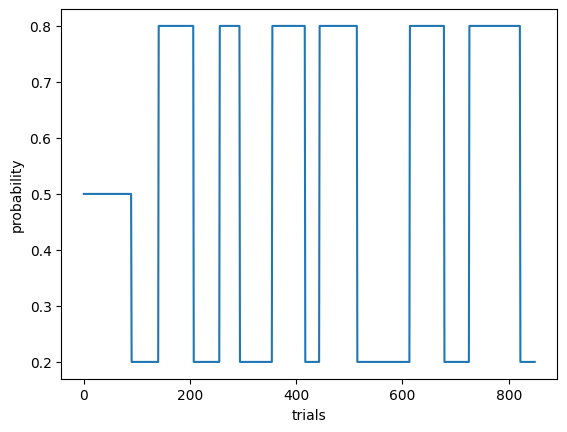

In [242]:
plt.plot(prob_left)
plt.xlabel('trials')
plt.ylabel('probability')

In [243]:
sl.load_wheel()

(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_13/2019-12-03/001/alf/_ibl_wheel.timestamps.npy: 100%|██████████| 11.8M/11.8M [00:02<00:00, 5.18MB/s]
(S3) /Users/sarahhu/Downloads/ONE/openalyx.internationalbrainlab.org/wittenlab/Subjects/ibl_witten_13/2019-12-03/001/alf/_ibl_wheel.position.npy: 100%|██████████| 11.8M/11.8M [00:02<00:00, 4.54MB/s]


In [244]:
wheel_df = sl.wheel
wheel_df

,times,position,velocity,acceleration
0,1.597700,0.001534,0.000000,0.000000
1,1.598700,0.001517,-0.018902,-18.902266
2,1.599700,0.001499,-0.018869,0.032826
3,1.600700,0.001482,-0.018820,0.049762
4,1.601700,0.001464,-0.018755,0.064603
...,...,...,...,...
4647171,4648.768555,698.133057,0.000540,-0.092102
4647172,4648.769531,698.133057,0.000458,-0.082681
4647173,4648.770508,698.133057,0.000384,-0.073577
4647174,4648.771484,698.133057,0.000319,-0.064877


In [245]:
# NEED TO BE MODIFIED! -- Finding the reaction time

# 1. Load in trials data
# eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
trials = one.load_object(eid, 'trials')

# 2. Explore the trials object

# Find the keys in our object
keys = trials.keys()

# Convert the trials dict to a pandas dataframe
trials_df = trials.to_df()

# Display the trials table
from IPython.display import display # import module to display dataframe nicely
display(trials_df)

,stimOff_times,goCueTrigger_times,contrastLeft,feedbackType,goCue_times,rewardVolume,feedback_times,firstMovement_times,choice,contrastRight,stimOn_times,response_times,probabilityLeft,intervals_0,intervals_1
0,300.046633,263.147133,NaN,1.0,263.147867,1.5,298.976567,284.0537,-1.0,0.2500,263.146933,298.976548,0.5,255.617567,300.476563
1,303.336200,301.852975,1.0,1.0,301.853700,1.5,302.264600,302.0797,1.0,NaN,301.852800,302.264579,0.5,301.153167,303.764598
2,308.902933,307.563441,1.0,1.0,307.564367,1.5,307.832233,307.6907,1.0,NaN,307.563233,307.832244,0.5,304.124500,309.332263
3,315.763033,313.380002,NaN,-1.0,313.381000,0.0,313.692667,313.5647,1.0,1.0000,313.379867,313.691905,0.5,309.775367,316.191931
4,319.846400,317.319539,NaN,-1.0,317.320333,0.0,317.785300,317.5037,1.0,0.0625,317.319400,317.784543,0.5,316.599733,320.284565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,3881.316433,3879.589343,NaN,1.0,3879.590300,1.5,3880.239933,3880.0997,-1.0,0.0625,3879.589167,3880.239948,0.2,3878.284533,3881.739961
846,3884.822400,3883.455873,NaN,1.0,3883.456600,1.5,3883.750967,3883.6547,-1.0,0.1250,3883.455700,3883.750976,0.2,3882.807367,3885.250992
847,3894.822300,3889.733234,0.0,-1.0,3889.733933,0.0,3892.745600,3892.6137,-1.0,NaN,3889.733067,3892.744764,0.2,3886.309400,3895.244792
848,3906.205533,3899.599828,NaN,1.0,3899.600567,1.5,3905.146267,3904.9247,-1.0,0.1250,3899.599633,3905.146277,0.2,3896.358400,3906.646292


Average reaction time for stimulus on
Left: 0.6317719374101046
Right: 0.7673141311225427
True

Average reaction time on Left overall: 0.6318

Average reaction time on Right overall: 0.7673


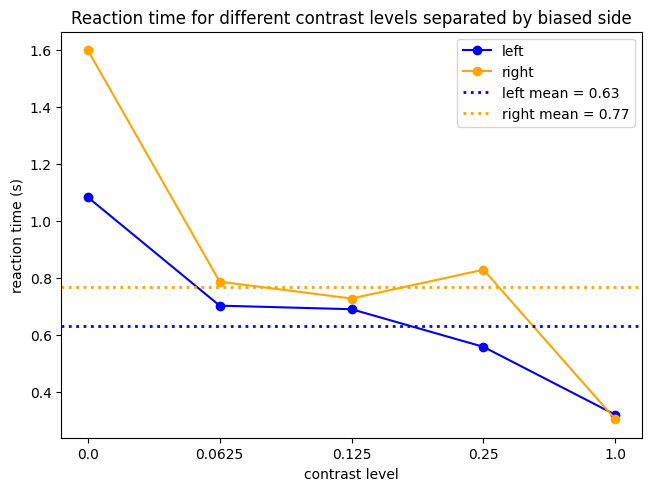

In [246]:
# 3. Compute reaction time (modified from IBL tutorial)

# Define reaction time as the time when the visual stimulus first appears and detected response time
reaction_time = trials['firstMovement_times'] - trials['stimOn_times']

# 4. Evaluate reaction time across different trial types
# Compare reaction time for left vs right trials
left_trial_idx = ~np.isnan(trials['contrastLeft'])
right_trial_idx = ~np.isnan(trials['contrastRight'])
left_reaction_time = np.nanmean(reaction_time[left_trial_idx])
right_reaction_time = np.nanmean(reaction_time[right_trial_idx])
print(f'Average reaction time for stimulus on')
print(f'Left: {left_reaction_time}')
print(f'Right: {right_reaction_time}')

# check that the length of nan contrastLeft columns is the same as nonnan contrastRight columns
tot = trials_df.shape[0]
print(np.sum(left_trial_idx)== tot-np.sum(right_trial_idx))

# compare reaction time for the magnitude of contrast for left and right separately

contrast_levels = np.sort(trials_df['contrastRight'].unique())
contrast_levels = contrast_levels[:5]
# contrast_levels = [0, 0.0625, 0.125, 0.25, 1]

# reaction time for each contrast level on the left
print(f'\nAverage reaction time on Left overall: {left_reaction_time:.4f}')
contrast_left_reaction_times = []
for i in range(len(contrast_levels)):
    contrast = contrast_levels[i]
    trial_idx = trials_df[trials_df['contrastLeft']==contrast].index
    left_reaction = np.nanmean(reaction_time[trial_idx])
    contrast_left_reaction_times.append(left_reaction)
    # print(f'Average reaction time for contrast level {contrast_levels[i]} is {left_reaction:.4f}.')

# reaction time for each contrast level on the right
contrast_right_reaction_times = []
print(f'\nAverage reaction time on Right overall: {right_reaction_time:.4f}')
for i in range(len(contrast_levels)):
    contrast = contrast_levels[i]
    trial_idx = trials_df[trials_df['contrastRight']==contrast].index
    right_reaction = np.nanmean(reaction_time[trial_idx])
    contrast_right_reaction_times.append(right_reaction)
    # print(f'Average reaction time for contrast level {contrast_levels[i]} is {right_reaction:.4f}.')

# plot the reaction time across contrast levels on left and right
fig, ax = plt.subplots(layout='constrained')
ax.plot(range(len(contrast_levels)), contrast_left_reaction_times, label='left', marker='o', color='blue')  # plot as if 0, 1, 2... are the x axis values
ax.plot(range(len(contrast_levels)), contrast_right_reaction_times, label='right', marker='o', color='orange')
plt.xticks(range(len(contrast_levels)), contrast_levels) # but label them with the contrast levels as if categorical
ax.set_xlabel('contrast level')
ax.set_ylabel('reaction time (s)')
ax.set_title('Reaction time for different contrast levels separated by biased side')
plt.axhline(y=left_reaction_time, color='blue', linestyle=':', linewidth=2, label=f'left mean = {left_reaction_time:.2f}')
plt.axhline(y=right_reaction_time, color='orange', linestyle=':', linewidth=2, label=f'right mean = {right_reaction_time:.2f}')
plt.legend()
plt.show()


In [271]:
# Compare reaction time for correct vs incorrect trials
correct_trial_idx = trials_df['feedbackType'] == 1
incorrect_trial_idx = trials_df['feedbackType'] == -1
correct_reaction_time = np.nanmean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.nanmean(reaction_time[incorrect_trial_idx])
print(f'\nAverage reaction time for trials that were')
print(f'Correct: {correct_reaction_time}')
print(f'Incorrect: {incorrect_reaction_time}')


Average reaction time for trials that were
Correct: 0.6095257215597006
Incorrect: 1.4420450755543721


### Class with functions for calculating reaction time across a session

In [274]:
class ReactionTime:
    """
    Computes the reaction times for any session. 

    Constructor params:
    reaction_type: defines the way to compute reaction time as either the difference between stimulus onset and first movement time (0)
    or the difference between stimulus onset and response time (1). 
    
    eid: the eid of the session. 
    
    Methods: 
    avg_reaction_time(self): computes and returns the average reaction time for all trials, and separated by left and right trials. 

    reaction_time_with_contrast(self, contrast_level, side=None): computes and returns the average reaction time for the specified 
    contrast level, where the contrast level must be a value in [0, 0.0625, 0.125, 0.25, 1]. 

    reaction_time_with_reward(self, reward): computes and returns the reaction time by the specified type of reward (rewarded or not). 
    Pass in reward=1 for rewarded trials and reward=0 for non-rewarded trials.


    """
    def __init__(self, reaction_type, eid):
        self.eid = eid  # Instance variable
        
        # load trial data
        trials = one.load_object(eid, 'trials')
        trials_df = trials.to_df()
        self.trials = trials_df  # make only the df accessible
        
        if reaction_type == 0:
            self.reaction_time = self.trials['firstMovement_times'] - self.trials['stimOn_times']
        elif reaction_type == 1:
            self.reaction_time = self.trials['firstMovement_times'] - self.trials['stimOn_times']
        else: 
            ValueError("reaction_type must be a value 0 or 1.")

    def avg_reaction_time(self):
        avg_reaction_time = np.nanmean(reaction_time)
        left_trial_idx = ~np.isnan(self.trials['contrastLeft'])
        right_trial_idx = ~np.isnan(self.trials['contrastRight'])
        left_reaction_time = np.nanmean(reaction_time[left_trial_idx])
        right_reaction_time = np.nanmean(reaction_time[right_trial_idx])
        print(f'Average reaction time for all trials: {avg_reaction_time:.4f}')
        print(f'Average reaction time for stimulus on')
        print(f'Left: {left_reaction_time}')
        print(f'Right: {right_reaction_time}')

    def reaction_time_with_contrast(self, contrast_level, side=None):
        contrast_levels = [0, 0.0625, 0.125, 0.25, 1]
        assert contrast_level in contrast_levels
        if side!= None:
            assert side in ['left', 'right']
            if side == 'left':
                trial_idx = self.trials[(self.trials['contrastLeft']==contrast)].index
                result = np.nanmean(reaction_time[trial_idx])
                print(f'Average reaction time on {side} side for contrast level {contrast_level} is {result:.4f}.')
            else: 
                trial_idx = self.trials[(self.trials['contrastRight']==contrast)].index
                result = np.nanmean(reaction_time[trial_idx])
                print(f'Average reaction time on {side} side for contrast level {contrast_level} is {result:.4f}.')
        else:
            trial_idx = self.trials[(self.trials['contrastLeft']==contrast) | (self.trials['contrastRight']==contrast)].index
            result = np.nanmean(reaction_time[trial_idx])
            print(f'Average reaction time for contrast level {contrast_level} is {result:.4f}.')
    
    def reaction_time_with_reward(self, reward):
        assert reward in [1, 0]
        if reward==1: 
            correct_trial_idx = self.trials['feedbackType'] == 1
            correct_reaction_time = np.nanmean(reaction_time[correct_trial_idx])
            print(f'\nAverage reaction time for trials that were correct: {correct_reaction_time:.4f}')
        else: 
            incorrect_trial_idx = trials_df['feedbackType'] == -1
            incorrect_reaction_time = np.nanmean(reaction_time[incorrect_trial_idx])
            print(f'\nAverage reaction time for trials that were incorrect: {incorrect_reaction_time:.4f}')

In [276]:
rt = ReactionTime(reaction_type = 1, eid=eid)
rt.avg_reaction_time()
rt.reaction_time_with_contrast(contrast_level=1, side='right')
rt.reaction_time_with_reward(reward=1)

Average reaction time for all trials: 0.6957
Average reaction time for stimulus on
Left: 0.6317719374101046
Right: 0.7673141311225427
Average reaction time on right side for contrast level 1 is 0.3025.

Average reaction time for trials that were correct: 0.6095


Text(0, 0.5, 'Reaction time (s)')

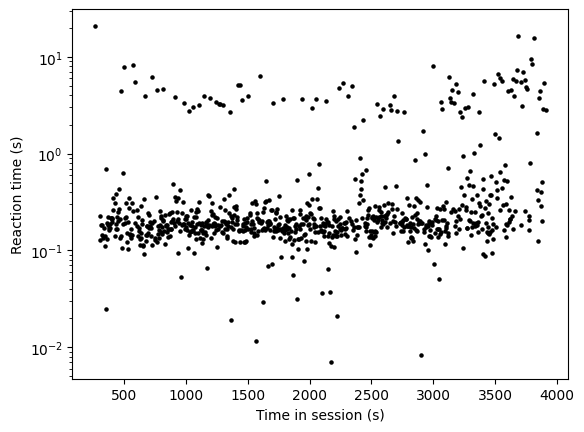

In [250]:
# 5. Make plot of reaction time across session
fig, ax = plt.subplots()
ax.scatter(trials['stimOn_times'], reaction_time, c='k', s=5)
ax.set_yscale("log")  # set y axis to log scale
ax.set_xlabel('Time in session (s)')
ax.set_ylabel('Reaction time (s)')

### PSTH for wheel movement

In [300]:
# PSTH for wheel velocity around stimOn times, comparison left and right sides. 

# Find times when first move is detected
events = np.array(sl.trials['stimOn_times'])

from brainbox.singlecell import bin_spikes
# Compute raster of wheel in 0.05s bins between 0.5s before the first move is detected to 1s after the first move is detected
bin_size = 0.05
pre_time = 0.2
post_time = 0.5
wheel_raster, times = bin_spikes(sl.wheel['times'], events, pre_time=pre_time, post_time=post_time, 
                                 bin_size=bin_size, weights=sl.wheel['velocity'])
events

array([ 263.14693333,  301.8528    ,  307.56323333,  313.37986667,
        317.3194    ,  321.20266667,  329.6191    ,  337.73606667,
        341.7859    ,  345.7629    ,  349.51273333,  352.91276667,
        358.08593333,  361.91906667,  365.97933333,  370.4023    ,
        373.86893333,  378.0356    ,  380.96893333,  384.71253333,
        388.8792    ,  393.01256667,  396.8186    ,  399.7291    ,
        403.50223333,  406.76873333,  410.679     ,  423.42896667,
        427.5456    ,  430.75193333,  433.50186667,  436.73493333,
        440.96213333,  444.62876667,  448.73503333,  452.8518    ,
        456.91836667,  461.22863333,  464.6016    ,  469.15156667,
        471.98496667,  474.73473333,  483.16173333,  488.0682    ,
        490.86793333,  494.42833333,  505.28443333,  508.6178    ,
        512.37813333,  516.27816667,  519.7782    ,  524.01136667,
        527.0113    ,  532.07806667,  535.31763333,  539.22796667,
        543.51766667,  546.71753333,  551.29453333,  556.28406

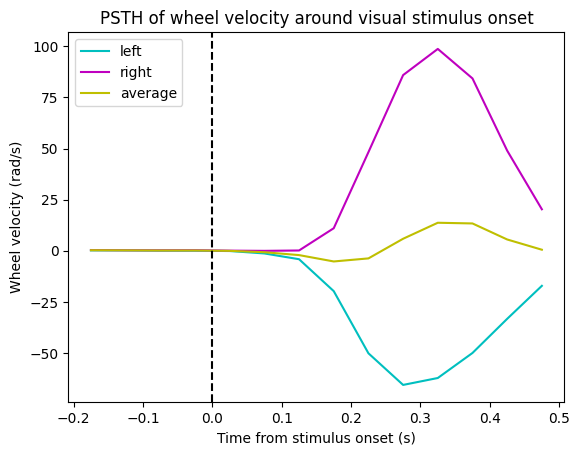

In [257]:
# separate by left and right trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
wheel_psth_left = np.nanmean(wheel_raster[left_idx], axis=0)
wheel_psth_right = np.nanmean(wheel_raster[right_idx], axis=0)

# for all trials, not separated by left or right
psth = np.mean(wheel_raster, axis=0) 

# Plot the psths
fig, axs = plt.subplots(gridspec_kw={'wspace': 0.5})
axs.plot(times, wheel_psth_left, c='c')
axs.plot(times, wheel_psth_right, c='m')
axs.plot(times, psth, c='y', label='average')
axs.legend(['left', 'right', 'average'], )
axs.axvline(0, c='k', linestyle='--')
axs.set_xlabel('Time from stimulus onset (s)')
axs.set_ylabel('Wheel velocity (rad/s)')
plt.title('PSTH of wheel velocity around visual stimulus onset')
plt.show()

In [298]:
# compare PSTH across contrast levels for just left side
left_trials = trials_df[left_trial_idx]

psth_dict = {}

for level in contrast_levels:
    idx = np.where(left_trials['contrastLeft'] == level)[0]  # trials for this difficulty
    if len(idx) == 0:
        continue  # skip if no trials of this level

    bin_size = 0.05
    pre_time = 0.5
    post_time = 1

    wheel_raster, tscale = bin_spikes(
        sl.wheel['times'],
        events[idx],  # only trials for this difficulty
        pre_time=pre_time,
        post_time=post_time,
        bin_size=bin_size,
        weights=sl.wheel['velocity']  
    )

    psth = wheel_raster.mean(axis=0)
    psth_dict[level] = psth  # store for this level

# formatted for printing
np.set_printoptions(legacy='1.25')
psth_dict



{0.0: array([  1.07062906,   0.05376945,   0.44896723,   0.14128751,
          0.31483905,   0.30296251,   0.20077923,   0.27309685,
          0.23507292,   0.1995705 ,  -0.79818168,  -2.83115896,
         -4.05319066,  -5.36193455,  -9.76223009,   5.37850935,
         28.12994546,  30.54093883,   7.5049075 , -13.58227756,
        -16.30915516,   4.3360555 ,  14.05983179,   4.69259686,
         -9.66017804,  -5.83407013,   6.62339363,  14.7751398 ,
          2.96583676,  -8.05389832]),
 0.0625: array([ 0.57939783,  0.10319627,  0.32673021,  0.50205933,  0.24495724,
         0.17061943,  0.27182698,  0.15997221,  0.15380656,  0.1859805 ,
        -0.45375688, -1.3407537 , -3.45660619, -8.21858095,  1.61623385,
        22.84231756, 23.61991989, 11.08068235, -0.44709687, -2.60407969,
         3.81993643,  6.20613714,  3.76541874,  1.07545183, -1.47094514,
        -5.95897154, -1.95474474,  3.09470374,  3.92366849,  0.69763697]),
 0.125: array([ 0.6060408 ,  0.72326659,  0.4371538 ,  0.5392

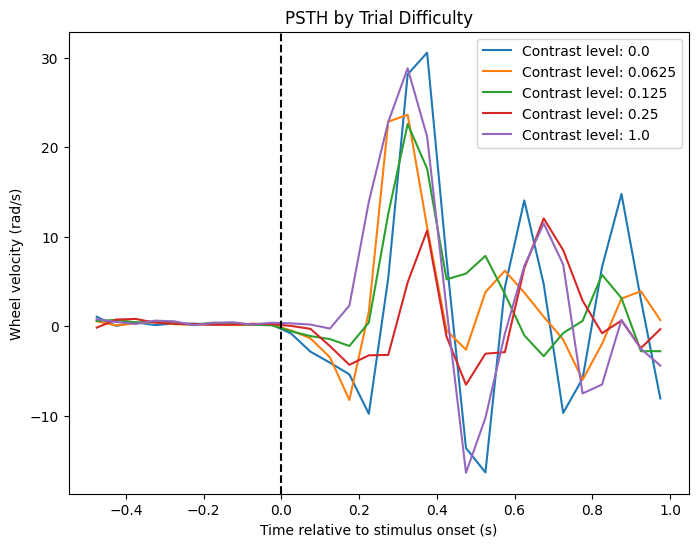

In [305]:
plt.figure(figsize=(8, 6))
for level, psth in psth_dict.items():
    plt.plot(tscale, psth, label=f'Contrast level: {level}')

plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('Wheel velocity (rad/s)')
plt.title('PSTH by Trial Difficulty')
plt.axvline(0, c='k', linestyle='--')
plt.legend()
plt.show()

In [306]:
# now do this for different probabilities
probs = np.unique(left_trials['probabilityLeft'])

psth_probs = {}

for prob in probs:
    idx = np.where(left_trials['probabilityLeft'] == prob)[0]  # trials for this probability
    if len(idx) == 0:
        continue  # skip if no trials of this probability

    bin_size = 0.05
    pre_time = 0.5
    post_time = 1

    wheel_raster, tscale = bin_spikes(
        sl.wheel['times'],
        events[idx],  # only trials for this difficulty
        pre_time=pre_time,
        post_time=post_time,
        bin_size=bin_size,
        weights=sl.wheel['velocity']  
    )

    psth = wheel_raster.mean(axis=0)
    psth_probs[prob] = psth  # store for this level

# formatted for printing
np.set_printoptions(legacy='1.25')
psth_probs


{0.2: array([  0.77309838,   0.38564674,   0.65853975,   0.6463683 ,
          0.47433044,   0.19363403,   0.28808323,   0.31410756,
          0.09668719,   0.12662746,  -0.96625301,  -1.84566796,
         -4.16256941,  -9.11834691, -12.89303268, -15.43905934,
        -13.76681368, -17.06521396, -17.41999394, -18.40260697,
        -14.28671591, -14.03369674, -12.49618943, -14.5518073 ,
         -7.43318445,  -4.95287648,   2.58114092,   2.83844064,
         -7.40944556, -10.45382405]),
 0.5: array([ 1.48889002,  0.68811412,  0.49901473,  0.31084063,  0.17429961,
         0.22326231,  0.59911078,  0.32272241,  0.10065578,  0.04690197,
        -0.07273735, -0.20653632, -0.98921837, -3.03292802, -2.81380717,
         9.79231017, 31.33250868, 37.09309223, 26.88958046, 22.65456369,
        18.45833456,  6.91070104, 12.86865287, 11.32739766,  9.94793139,
         8.72080909,  0.7136523 ,  0.70230447, -2.3288659 , -2.11837319]),
 0.8: array([ 0.34012452,  0.46497785,  0.41836007,  0.46159339,

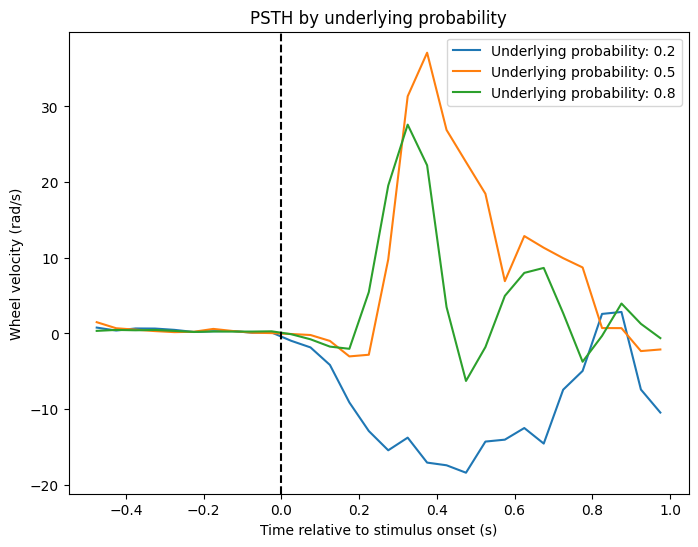

In [ ]:
# plot psth for each probability level

plt.figure(figsize=(8, 6))
for prob, psth in psth_probs.items():
    plt.plot(tscale, psth, label=f'Underlying probability: {prob}')

plt.xlabel('Time relative to stimulus onset (s)')
plt.ylabel('Wheel velocity (rad/s)')
plt.title('PSTH by underlying probability')
plt.axvline(0, c='k', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# also look at the rewarded vs non-rewarded trials
# but first, let's check if the mouse is rewarded always for a correct choice on non-zero contrast trials 

non_zero_trials = trials_df[(trials_df['contrastLeft']!=0)&(trials_df['contrastRight']!=0)]
print(non_zero_trials.shape)
num_rewards = non_zero_trials[non_zero_trials['feedbackType']==1]
print(num_rewards.shape)

num_correct_right = non_zero_trials[np.isnan(non_zero_trials['contrastLeft']) & (non_zero_trials['choice']==-1)]
print(num_correct_right.shape)

num_correct_left = non_zero_trials[np.isnan(non_zero_trials['contrastRight']) & (non_zero_trials['choice']==1)]
print(num_correct_left.shape)

# confirmed!

# so maybe we should take another look at the probability trials above and filter out trials where contrast is non-zero? 

(748, 15)
(690, 15)
(323, 15)
(367, 15)
